In [1]:
import pandas as pd
from preprocess import Audio_Processor
import data_utils as du
from sklearn import metrics
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Setup

In [3]:
path_to_db='../ESC-50/'
ps = Audio_Processor(path_to_db + 'audio/')

# Load Dataset
Here we load the csv that describes each file in the dataset. We add a high level category that is defined in the ESC-50 documentation. This we realize is anthetical to true training, it is a stopgap for when we use NLP to classify tags into these categories.

In [4]:
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')
classes = [None] * 50
h_classes = ['animal', 'nature', 'human', 'domestic', 'urban']

In [5]:
dataset['h_category'] = None
for index, row in dataset.iterrows():
    target = row['target']
    classes[target] = row['category']
    if target < 10:
        dataset.loc[index, 'h_category'] = 0
    elif target < 20:
        dataset.loc[index, 'h_category'] = 1
    elif target < 30:
        dataset.loc[index, 'h_category'] = 2
    elif target < 40:
        dataset.loc[index, 'h_category'] = 3
    elif target < 50:
        dataset.loc[index, 'h_category'] = 4

In [6]:
dataset.head()

,filename,fold,target,category,esc10,src_file,take,h_category
0,1-100032-A-0.wav,1,0,dog,True,100032,A,0
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,1
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,3
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,3
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,1


## Getting Preprocessed Data
We allow for previously preprocessed data to be retrieved for faster training turnaround. If the fold has been preprocessed, it is loaded but if not it is processed and saved.

In [7]:
c_data = pd.concat([ps.preprocess_fold(fld, dataset) for fld in range(1,6)], ignore_index=True)

In [8]:
n_categories = c_data.target.unique().size

In [9]:
c_data, scalar = du.normalize_data(c_data, 'target')
train, test = du.split_training_test(c_data, 0.2)
train_X = train.drop(columns=['target'])
train_y = train.target
test_X = test.drop(columns=['target'])
test_y = test.target

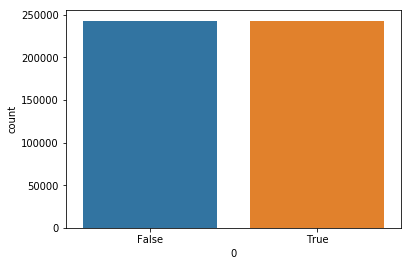

In [10]:
import seaborn as sns
xx, yy = du.balanced_supersample(train_X, train_y.between(0,10))
sns.countplot(yy[0])

## High-Level Shallow Nets
Train binary shallow nets for high level categories(animals, natural, human, domestic, urban)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                468       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
499664/499664 [==============================] - 30s 61us/step - loss: 0.5901 - acc: 0.6731
Epoch 2/20
499664/499664 [==============================] - 22s 44us/step - loss: 0.5543 - acc: 0.7027
Epoch 3/20
499664/499664 [==============================] - 22s 44us/step - loss: 0.5456 - acc: 0.7093
Epoch 4/20
499664/499664 [==============================] - 22s 44us/step - loss: 0.5421 - acc: 0.7

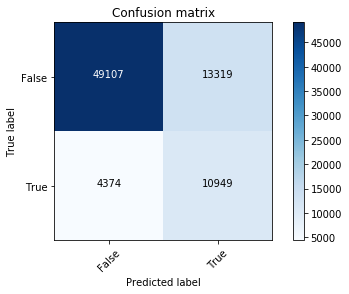

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                468       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
488326/488326 [==============================] - 21s 43us/step - loss: 0.6123 - acc: 0.6516
Epoch 2/20
488326/488326 [==============================] - 20s 41us/step - loss: 0.5858 - acc: 0.6810
Epoch 3/20
488326/488326 [==============================] - 20s 41us/step - loss: 0.5820 - acc: 0.6869
Epoch 4/20
488326/488326 [==============================] - 20s 41us/step - loss: 0.5802 - acc: 0.6

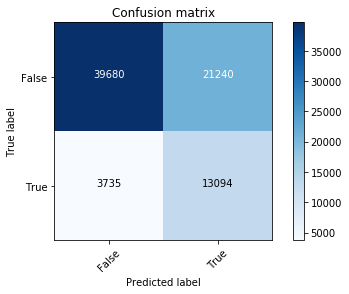

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                468       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
504626/504626 [==============================] - 21s 42us/step - loss: 0.6291 - acc: 0.6509
Epoch 2/20
504626/504626 [==============================] - 21s 41us/step - loss: 0.6069 - acc: 0.6777
Epoch 3/20
504626/504626 [==============================] - 21s 41us/step - loss: 0.6012 - acc: 0.6832
Epoch 4/20
504626/504626 [==============================] - 21s 41us/step - loss: 0.5986 - acc: 0.6

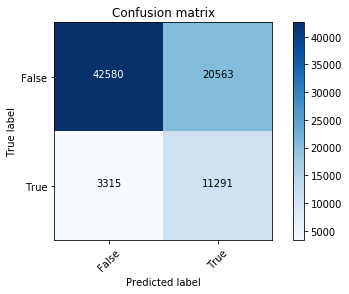

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                468       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
506148/506148 [==============================] - 22s 43us/step - loss: 0.6058 - acc: 0.6634
Epoch 2/20
506148/506148 [==============================] - 21s 41us/step - loss: 0.5852 - acc: 0.6852
Epoch 3/20
506148/506148 [==============================] - 21s 41us/step - loss: 0.5813 - acc: 0.6899
Epoch 4/20
506148/506148 [==============================] - 21s 42us/step - loss: 0.5784 - acc: 0.6

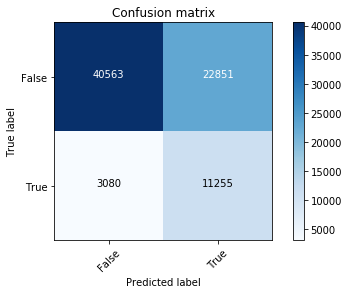

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                468       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
489188/489188 [==============================] - 21s 43us/step - loss: 0.5564 - acc: 0.7063
Epoch 2/20
489188/489188 [==============================] - 20s 41us/step - loss: 0.5227 - acc: 0.7318
Epoch 3/20
489188/489188 [==============================] - 20s 41us/step - loss: 0.5170 - acc: 0.7344
Epoch 4/20
489188/489188 [==============================] - 20s 41us/step - loss: 0.5148 - acc: 0.7

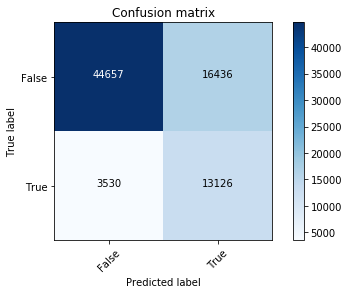

In [11]:
import snn_classifier as snn_clas
from classification_plots import plot_confusion_matrix
import matplotlib.pyplot as plt
hl_shallow = {}
for i in range(0,5):
    start_i = i * 10
    end_i = ((i + 1) * 10) - 1
#     Get equally distributed set of positive and negative instances
    xx, yy = du.balanced_supersample(train_X, train_y.between(start_i, end_i))
    clas = KerasClassifier(build_fn=snn_clas.create_baseline, epochs=20, batch_size=128, verbose=1)
    clas.fit(xx, yy)
    pred = clas.predict(test_X)
    pred = [item[0] for item in pred]
    print(str(h_classes[i]) + ": " + 
      str(metrics.accuracy_score(test_y.between(start_i, end_i), pred)))
    cm = metrics.confusion_matrix(test_y.between(start_i, end_i), pred)
    plot_confusion_matrix(cm, ['False', 'True'])
    plt.show()
    hl_shallow[h_classes[i]] = clas